In [2]:
import os
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
len_min = 3

In [4]:
disease = 'multiple_myeloma'
file_name = 'ehr-shuffle.csv'
date_time_folder = '2018-10-10-16-44-0' 

data_folder = os.path.expanduser('~/data1/complex_disorders/data/%s/cohorts/%s' % (disease, date_time_folder))

with open(os.path.join(data_folder, file_name)) as f:
    rd = csv.reader(f)
    ehr_shuffle = {}
    sub_len = []
    for r in rd:
        sub_len.append(len(r[1::]))
        ehr_shuffle.setdefault(r[0], list()).extend(r[1::])

In [5]:
print("The average number of tokens for each time slot of N days is {0:.2f}".format(np.mean(sub_len)))

The average number of tokens for each time slot of N days is 9.50


(array([9.708e+04, 8.317e+03, 2.842e+03, 1.515e+03, 6.980e+02, 2.830e+02,
        1.090e+02, 3.700e+01, 6.000e+00, 3.000e+00]),
 array([  1.,  19.,  37.,  55.,  73.,  91., 109., 127., 145., 163., 181.]),
 <a list of 10 Patch objects>)

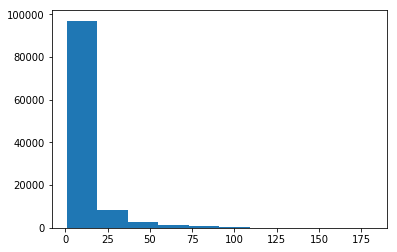

In [6]:
plt.hist(sub_len)

In [7]:
l = []
for mrn in ehr_shuffle:
    l.append(len(ehr_shuffle[mrn]))
print("The average length of ehr sequences is: {0:.2f}".format(np.mean(l)))

The average length of ehr sequences is: 82.74


In [8]:
count = 0
for ll in l:
    if ll<3:
        count += 1
print("{0} of {1} patients have less than 3 records".format(count, len(l)))

787 of 12735 patients have less than 3 records


In [9]:
print("The sequence length ranges from {0} to {1}".format(min(l), max(l)))

The sequence length ranges from 1 to 3826


(array([1.017e+04, 1.312e+03, 5.230e+02, 2.740e+02, 1.530e+02, 9.900e+01,
        5.300e+01, 4.900e+01, 2.400e+01, 2.600e+01, 1.700e+01, 7.000e+00,
        7.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.07250e+02, 2.13500e+02, 3.19750e+02, 4.26000e+02,
        5.32250e+02, 6.38500e+02, 7.44750e+02, 8.51000e+02, 9.57250e+02,
        1.06350e+03, 1.16975e+03, 1.27600e+03, 1.38225e+03, 1.48850e+03,
        1.59475e+03, 1.70100e+03, 1.80725e+03, 1.91350e+03, 2.01975e+03,
        2.12600e+03, 2.23225e+03, 2.33850e+03, 2.44475e+03, 2.55100e+03,
        2.65725e+03, 2.76350e+03, 2.86975e+03, 2.97600e+03, 3.08225e+03,
        3.18850e+03, 3.29475e+03, 3.40100e+03, 3.50725e+03, 3.61350e+03,
        3.71975e+03, 3.82600e+03]),
 <a lis

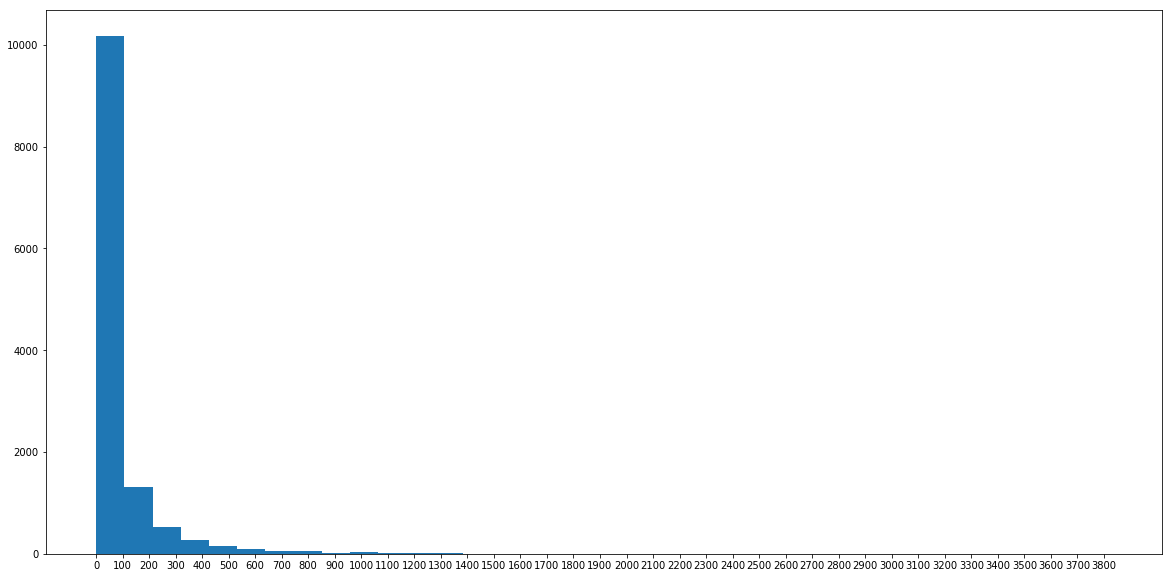

In [10]:
plt.figure(figsize=[20,10])
plt.xticks(np.arange(0, max(l), 100))
plt.hist(l, bins = 36)

In [22]:
with open(os.path.join(data_folder, 'list_mrnToDrop.csv'), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    discard_list = []
    for mrn in ehr_shuffle:
        if len(ehr_shuffle[mrn]) < len_min:
            discard_list.append(mrn)
    wr.writerow(discard_list)

In [23]:
print("We are dropping {0} out of {1} patients".format(len(discard_list), len(ehr_shuffle)))

We are dropping 849 out of 13432 patients
